# Financial Portfolios, Modern Portfolio Theory & Asset Pricing

## Getting the Data

In [ ]:
import pandas as pd
import yfinance as yf

In [ ]:
#stocks = yf.download(["AMZN", "BA", "DIS", "IBM", "KO", "MSFT"], 
                     #start = "2014-01-01", end = "2018-12-31")

In [ ]:
stocks = pd.read_csv("index_stocks.csv", header = [0,1], index_col = [0], parse_dates = [0])

In [ ]:
stocks.head()

In [ ]:
stocks.tail()

In [ ]:
stocks = stocks["Adj Close"].copy()

In [ ]:
stocks.head()

In [ ]:
stocks.to_csv("port_stocks.csv")

## Creating the equal-weighted Portfolio

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")
pd.options.display.float_format = '{:.4f}'.format

In [ ]:
stocks = pd.read_csv("port_stocks.csv", parse_dates= ["Date"], index_col= "Date")

In [ ]:
stocks.head()

In [ ]:
ret = stocks.pct_change().dropna()

In [ ]:
ret.head()

In [ ]:
ret.mean(axis = 1)

In [ ]:
no_assets = len(stocks.columns)
no_assets

In [ ]:
weights = [1/no_assets for i in range(no_assets)]
weights

In [ ]:
ret.mul(weights, axis = "columns").sum(axis = 1)

In [ ]:
ret.dot(weights)

In [ ]:
ret["EWP"] = ret.dot(weights)

In [ ]:
ret.head()

In [ ]:
summary = ret.agg(["mean", "std"]).T

In [ ]:
summary

In [ ]:
summary.columns = ["Return", "Risk"]

In [ ]:
summary.Return = summary.Return*252
summary.Risk = summary.Risk * np.sqrt(252)

In [ ]:
summary

In [ ]:
summary.plot(kind = "scatter", x = "Risk", y = "Return", figsize = (13,9), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "Risk"]+0.002, summary.loc[i, "Return"]+0.002), size = 15)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

In [ ]:
def ann_risk_return(returns_df):
    summary = returns_df.agg(["mean", "std"]).T
    summary.columns = ["Return", "Risk"]
    summary.Return = summary.Return*252
    summary.Risk = summary.Risk * np.sqrt(252)
    return summary

## Creating many Random Portfolios

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")
pd.options.display.float_format = '{:.4f}'.format

In [ ]:
stocks = pd.read_csv("port_stocks.csv", parse_dates= ["Date"], index_col= "Date")

In [ ]:
stocks.head()

In [ ]:
ret = stocks.pct_change().dropna()
ret.head()

In [ ]:
summary = ann_risk_return(ret)

In [ ]:
summary

In [ ]:
noa = len(stocks.columns)
noa

In [ ]:
nop = 100000
nop

In [ ]:
np.random.random(10*6).reshape(10,6)

In [ ]:
np.random.seed(123)
matrix = np.random.random(noa * nop).reshape(nop, noa)

In [ ]:
matrix

In [ ]:
matrix.sum(axis = 1, keepdims= True)

In [ ]:
weights = matrix / matrix.sum(axis = 1, keepdims= True)

In [ ]:
weights

In [ ]:
weights.sum(axis = 1, keepdims= True)

In [ ]:
port_ret = ret.dot(weights.T)

In [ ]:
port_ret

In [ ]:
port_summary = ann_risk_return(port_ret)

In [ ]:
port_summary

In [ ]:
plt.figure(figsize = (15, 9))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"],s= 20, color = "red")
plt.scatter(summary.loc[:, "Risk"], summary.loc[:, "Return"], s= 50, color = "black", marker = "D")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

## What is the Sharpe Ratio and a Risk Free Asset? 

\begin{equation}
    SharpeRatio = \frac{PortReturn - RFR}{PortRisk}
\end{equation}

In [ ]:
risk_free_return = 0.017
risk_free_risk = 0

In [ ]:
rf = [risk_free_return, risk_free_risk]
rf

## Portfolio Analysis with the Sharpe Ratio

In [ ]:
summary

In [ ]:
port_summary.head()

In [ ]:
summary["Sharpe"] = (summary["Return"].sub(rf[0]))/summary["Risk"]

In [ ]:
summary

In [ ]:
port_summary["Sharpe"] = (port_summary["Return"].sub(rf[0]))/port_summary["Risk"]

In [ ]:
port_summary.head()

In [ ]:
port_summary.info()

In [ ]:
port_summary.describe()

In [ ]:
plt.figure(figsize = (15, 8))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"], s= 20, 
            c = port_summary.loc[:, "Sharpe"], cmap = "coolwarm", vmin = 0.76, vmax = 1.18, alpha = 0.8)
plt.colorbar()
plt.scatter(summary.loc[:, "Risk"], summary.loc[:, "Return"],s= 50, marker = "D", c = "black")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Sharpe Ratio", fontsize = 20)
plt.show()

In [ ]:
plt.figure(figsize = (15, 8))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"], s= 20, 
            c = port_summary.loc[:, "Sharpe"], cmap = "coolwarm", vmin = 0.76, vmax = 1.18, alpha = 0.8)
plt.scatter(summary.loc[:, "Risk"], summary.loc[:, "Return"],s= 50, marker = "D",
            c = summary.loc[:, "Sharpe"], cmap = "coolwarm", vmin = 0.76, vmax = 1.18,)
plt.colorbar()
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Sharpe Ratio", fontsize = 20)
plt.show()

## Finding the optimal Portfolio - The "Max Sharpe Ratio Portfolio"

In [ ]:
port_summary.head()

In [ ]:
port_summary.describe()

In [ ]:
weights

In [ ]:
msrp = port_summary.Sharpe.idxmax()
msrp

In [ ]:
msrp_p = port_summary.iloc[msrp]
msrp_p

In [ ]:
msrp_w = weights[msrp, :]
msrp_w

In [ ]:
pd.Series(index = stocks.columns, data = msrp_w)

In [ ]:
opt_weights = pd.Series(index = stocks.columns, data = 
                        np.array([2.59608281e-01, 3.48750774e-01, 2.42861287e-17, 5.20417043e-18, 8.89045781e-17, 3.91640945e-01]))

In [ ]:
opt_weights

In [ ]:
ret["MP"] = ret.dot(opt_weights)

In [ ]:
ret.head()

In [ ]:
summary = ann_risk_return(ret)

In [ ]:
summary["Sharpe"] = (summary["Return"].sub(rf[0]))/summary["Risk"]

In [ ]:
summary

In [ ]:
plt.figure(figsize = (15, 8))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"], s= 20, c = port_summary.loc[:, "Sharpe"], cmap = "coolwarm", vmin = 0.76, vmax = 1.18, alpha = 0.8)
plt.colorbar()
plt.scatter(summary.loc["MP", "Risk"], summary.loc["MP", "Return"],s= 500, c = "black", marker = "*")
plt.annotate("Max SR Portfolio", xy=(summary.loc["MP", "Risk"]-0.04, summary.loc["MP", "Return"]+0.01), size = 20, color = "black")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("The Max Sharpe Ratio Portfolio", fontsize = 20)
plt.show()

----------------------------------------

## The Sharpe Ratio - a graphical intuition (PP)

In [ ]:
plt.figure(figsize = (20, 10))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"], s= 20, c = port_summary.loc[:, "Sharpe"], cmap = "coolwarm", vmin = 0.76, vmax = 1.18, alpha = 0.8)
plt.colorbar()
plt.scatter(summary.loc["MP", "Risk"], summary.loc["MP", "Return"],s= 300, c = "black", marker = "*")
plt.annotate("Max SR Portfolio", xy=(summary.loc["MP", "Risk"]-0.06, summary.loc["MP", "Return"]+0.01), size = 20, color = "black")
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "black")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.01, rf[0] - 0.01), size = 20, color = "black")
plt.xlabel("ann. Risk(std)", fontsize = 20)
plt.ylabel("ann. Return", fontsize = 20)
plt.tick_params(axis = "both", labelsize = 15)
plt.title("The Max Sharpe Ratio Portfolio", fontsize = 25)
plt.plot([rf[1],summary.loc["MP", "Risk"]], [rf[0],summary.loc["MP", "Return"]], c = "black")
plt.annotate("Capital Market Line", xy = (0.04, 0.16), size = 20, color = "black")
plt.show()

## Capital Market Line & Two-Fund-Theorem (PP)

In [ ]:
plt.figure(figsize = (20, 10))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"], s= 20, c = port_summary.iloc[:, 2], cmap = "coolwarm", vmin = 0.76, vmax = 1.18, alpha = 0.8)
plt.colorbar()
plt.scatter(summary.loc["MP", "Risk"], summary.loc["MP", "Return"],s= 200, c = "black", marker = "*")
plt.annotate("Market Portfolio", xy=(summary.iloc[6, 1], summary.iloc[6, 0]+0.02), size = 20, color = "black")
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "black")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.01, rf[0] - 0.01), size = 20, color = "black")
plt.plot([rf[1],summary.loc["MP", "Risk"]], [rf[0],summary.loc["MP", "Return"]], c = "black")
plt.annotate("Capital Market Line", xy = (0.04, 0.16), size = 20, color = "black")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Capital Market Line", fontsize = 20)
plt.show()

--------------------------------------

## The Portfolio Diversification Effect

In [ ]:
summary

In [ ]:
opt_weights

In [ ]:
weighted_av = summary.loc[:"MSFT", ["Return", "Risk"]].T.dot(opt_weights)
weighted_av

In [ ]:
plt.figure(figsize = (15, 8))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"], s= 20, c = port_summary.loc[:, "Sharpe"], cmap = "coolwarm", vmin = 0.76, vmax = 1.18, alpha = 0.8)
plt.colorbar()
plt.scatter(summary.loc["MP", "Risk"], summary.loc["MP", "Return"],s= 300, c = "black", marker = "*")
plt.annotate("Market Portfolio", xy=(summary.loc["MP", "Risk"], summary.loc["MP", "Return"]+0.02), size = 20, color = "black")
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "black")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.01, rf[0] - 0.01), size = 20, color = "black")
plt.scatter(weighted_av.Return, weighted_av.Risk,s= 300, c = "purple", marker = "*")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Diversification Effect", fontsize = 20)
plt.show()

In [ ]:
three_stocks = pd.DataFrame(data = {"A": [0.05, 0.1, -0.02, 0.04, 0.06, -0.04, 0.03, 0.15, 0.06, 0.02], 
                                  "B": [0.05, 0.0, 0.12, 0.06, 0.04, 0.14, 0.07, -0.05, 0.04, 0.08], 
                                  "C": [0.1, 0.2, -0.04, 0.08, 0.12, -0.08, 0.06, 0.3, 0.12, 0.04]},
            index = range(1, 11))
three_stocks

In [ ]:
three_stocks.loc[:, ["A", "C"]].plot()
plt.show()

In [ ]:
three_stocks.iloc[:, :3].corr()

In [ ]:
three_stocks["AB"] = three_stocks[["A", "B"]].mean(axis = 1)

In [ ]:
three_stocks["AC"] = three_stocks[["A", "C"]].mean(axis = 1)

In [ ]:
three_stocks

In [ ]:
three_stocks.loc[:, ["AB", "AC"]].plot()
plt.show()

In [ ]:
summ = three_stocks.agg(["mean", "std"])
summ

In [ ]:
summ[["A", "B"]].mean(axis = 1)

In [ ]:
summ[["A", "C"]].mean(axis = 1)

In [ ]:
ret.corr()

## Systematic vs. unsystematic (diversifiable) Risk

In [ ]:
summary

In [ ]:
summary["TotalRisk_var"] = np.power(summary.Risk, 2)

In [ ]:
summary

In [ ]:
ret.head()

In [ ]:
COV = ret.cov()*252

In [ ]:
COV

In [ ]:
opt_weights

In [ ]:
COV.iloc[:-1, -1].dot(opt_weights)

In [ ]:
COV.iloc[-1, -1]

In [ ]:
summary["SystRisk_var"] = COV.iloc[:, -1]

In [ ]:
summary

In [ ]:
summary["UnsystRisk_var"] = summary["TotalRisk_var"].sub(summary["SystRisk_var"])

In [ ]:
summary

In [ ]:
summary.iloc[[0, 1, 5, 6], 4:].plot(kind = "bar", stacked = True, figsize= (15, 8), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [ ]:
plt.figure(figsize = (15, 8))
plt.scatter(summary.TotalRisk_var, summary.Return)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "TotalRisk_var"]+0.002, summary.loc[i, "Return"]+0.002), size = 15)
plt.plot([rf[1], summary.loc["MP", "TotalRisk_var"]], [rf[0], summary.loc["MP", "Return"]])
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "green")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.002, rf[0] - 0.01), size = 20, color = "green")
plt.xlabel("ann. Total Risk(var)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Total Risk / Return", fontsize = 20)
plt.show()

In [ ]:
plt.figure(figsize = (15, 8))
plt.scatter(summary.SystRisk_var, summary.Return)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "SystRisk_var"]+0.001, summary.loc[i, "Return"]-0.01), size = 15)
plt.plot([rf[1], summary.loc["AMZN", "SystRisk_var"]], [rf[0], summary.loc["AMZN", "Return"]])
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "green")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.001, rf[0] - 0.01), size = 20, color = "green")
plt.xlabel("ann. Systematic Risk(var)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Systematic Risk / Return", fontsize = 20)
plt.show()

### CAPM & the Security Market Line

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
summary

In [ ]:
summary.SystRisk_var / summary.loc["MP", "SystRisk_var"]

In [ ]:
summary["beta"] = summary.SystRisk_var / summary.loc["MP", "SystRisk_var"]

In [ ]:
summary

In [ ]:
plt.figure(figsize = (15, 8))
plt.scatter(summary.beta, summary.Return)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "beta"]+0.00, summary.loc[i, "Return"]-0.015), size = 15)
plt.plot([rf[1], summary.loc["AMZN", "beta"]], [rf[0], summary.loc["AMZN", "Return"]])
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "green")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.002, rf[0] - 0.02), size = 20, color = "green")
plt.xlabel("beta", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("beta / Return", fontsize = 20)
plt.show()

y =      i  +         slope           * x

Return = RFR + (Market Portfolio Return - RFR) * beta

In [ ]:
rf[0] + (summary.loc["MP", "Return"] - rf[0]) * summary.loc["AMZN", "beta"]

In [ ]:
summary["capm_ret"] = rf[0] + (summary.loc["MP", "Return"] - rf[0]) * summary.beta

In [ ]:
summary

## Beta and Alpha

In [ ]:
summary

In [ ]:
summary["alpha"] = summary.Return - summary.capm_ret

In [ ]:
ret.head()

In [ ]:
sns.set(font_scale=1.5)
sns.jointplot(data = ret, x = "MP", y = "AMZN", height = 10, kind = "reg")
plt.show()

In [ ]:
np.polyfit(ret.MP, ret.AMZN, 1)

In [ ]:
AMZN_beta = np.polyfit(ret.MP, ret.AMZN, 1)[0]
AMZN_beta

In [ ]:
summary

## Final Considerations (and a more real world scenario)

In [ ]:
ret.drop(columns = ["MP"], inplace =True)

In [ ]:
ret

In [ ]:
mcap_weights = pd.read_csv("mcap_weights.csv", parse_dates = ["Date"], index_col = "Date")

In [ ]:
mcap_weights

In [ ]:
ret["MCAP_P"] = ret.mul(mcap_weights.shift().dropna()).sum(axis = 1)

In [ ]:
summary = ann_risk_return(ret)

In [ ]:
summary

In [ ]:
COV = ret.cov()*252

In [ ]:
COV

In [ ]:
summary["SystRisk_var"] = COV.iloc[:, -1]

In [ ]:
summary["beta"] = summary.SystRisk_var / summary.loc["MCAP_P", "SystRisk_var"]

In [ ]:
summary

In [ ]:
plt.figure(figsize = (15, 8))
plt.scatter(summary.beta, summary.Return)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "beta"]+0.01, summary.loc[i, "Return"]-0.01), size = 15)
plt.plot([rf[1], summary.loc["AMZN", "beta"]], [rf[0],rf[0] + summary.loc["AMZN", "beta"]*(summary.loc["MCAP_P", "Return"] - rf[0])])
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "green")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.01, rf[0] - 0.01), size = 20, color = "green")
plt.xlabel("beta", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("beta / Return", fontsize = 20)
plt.show()

## Another Intuition on Beta: Cyclical vs. non-Cyclical Stocks

In [ ]:
ret.head()

In [ ]:
summary

In [ ]:
sns.set(font_scale=1.5)
sns.jointplot(data = ret, x = "MCAP_P", y = "AMZN", height = 10, kind = "reg")
plt.show()

In [ ]:
np.polyfit(ret.MCAP_P, ret.AMZN, 1)

In [ ]:
sns.set(font_scale=1.5)
sns.jointplot(data = ret, x = "MCAP_P", y = "KO", height = 10, kind = "reg")
plt.show()

In [ ]:
stocks = yf.download(["AMZN", "KO"], "2007-12-31", "2018-12-31").Close

In [ ]:
stocks

In [ ]:
stocks.resample("M").last().pct_change().rolling(12).mean().dropna().plot(figsize = (15, 12), subplots = True, sharey = True)
plt.show()

In [ ]:
pd.options.display.float_format = '{:.4f}'.format

## Forward-looking Portfolios - 2-Asset Case (Mean-Variance Optimization)

In [ ]:
ret.head()

In [ ]:
two_assets = ret.iloc[:, :2]
two_assets.head()

In [ ]:
summ_two = ann_risk_return(two_assets)
summ_two

In [ ]:
w_AMZN = 0.6
w_BA = 0.4
ws = np.array([w_AMZN, w_BA])
ws

### Calculating Expected Portfolio Return

In [ ]:
ERet_AMZN = 0.20
ERet_BA = 0.15
ERets = pd.Series({"AMZN": ERet_AMZN, "BA": ERet_BA})
ERets

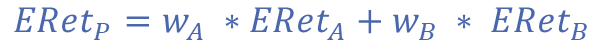

In [ ]:
ERet_P = w_AMZN * ERet_AMZN + w_BA * ERet_BA
ERet_P

In [ ]:
ERets.dot(ws)

### Calculating Expected Portfolio Risk

In [ ]:
cov_matrix = two_assets.cov() * 252
cov_matrix

In [ ]:
VAR_AMZN = cov_matrix.iloc[0,0]
VAR_AMZN

In [ ]:
VAR_BA = cov_matrix.iloc[1,1]
VAR_BA

In [ ]:
cov_AMZN_BA = cov_matrix.iloc[1,0]
cov_AMZN_BA

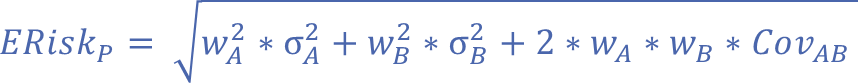

In [ ]:
ERisk_P = np.sqrt(w_AMZN**2 * VAR_AMZN + w_BA**2 * VAR_BA + 2 * w_AMZN * w_BA * cov_AMZN_BA)
ERisk_P

In [ ]:
np.sqrt(cov_matrix.dot(ws).dot(ws))

### Many Random Portfolios

In [ ]:
np.random.seed(123)
matrix = np.random.random(10000 * 2).reshape(10000, 2)

In [ ]:
weights = matrix / matrix.sum(axis = 1, keepdims= True)

In [ ]:
weights

In [ ]:
Return = ERets.dot(weights.T)
Return

In [ ]:
Risk = np.sqrt((cov_matrix.dot(weights.T).T * weights).sum(axis = 1))
Risk

In [ ]:
summ = pd.DataFrame({"Return" : Return, "Risk" : Risk})
summ

In [ ]:
plt.figure(figsize = (15, 9))
plt.scatter(summ.Risk, summ.Return,s= 20, color = "red")
plt.scatter(summ_two.Risk, ERets, color = "blue")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

## Forward-looking Portfolios - not that simple

In [ ]:
ret.head()

In [ ]:
COV

In [ ]:
COV_C = COV.iloc[:-1, :-1]
COV_C

In [ ]:
summary

In [ ]:
summary_C = summary.iloc[:-1, :].copy()

In [ ]:
summary_C

In [ ]:
summary_C["ER1"] = [0.25, 0.15, 0.08, 0.08, 0.10, 0.15] 

In [ ]:
summary_C

In [ ]:
noa = len(summary_C.index)
noa

In [ ]:
nop = 1000000
nop

In [ ]:
np.random.seed(123)
matrix = np.random.random(noa * nop).reshape(nop, noa)

In [ ]:
matrix

In [ ]:
weights = matrix / matrix.sum(axis = 1, keepdims= True)

In [ ]:
weights

In [ ]:
Return = summary_C.ER1.dot(weights.T)
Return

In [ ]:
Risk = np.sqrt((COV_C.dot(weights.T).T * weights).sum(axis = 1))
Risk

In [ ]:
Risk.shape

In [ ]:
Return.shape

In [ ]:
rf = 0.02

In [ ]:
Sharpe = (Return - rf) / Risk

In [ ]:
summ = pd.DataFrame({"Return" : Return, "Risk" : Risk, "Sharpe" : Sharpe})
summ

In [ ]:
plt.figure(figsize = (15, 9))
plt.scatter(summ.Risk, summ.Return,s= 20, color = "red")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

In [ ]:
summ.describe()

In [ ]:
summ.Sharpe.idxmax()

In [ ]:
summ.iloc[summ.Sharpe.idxmax(), :]

In [ ]:
weights[summ.Sharpe.idxmax()]

In [ ]:
PF1 = pd.Series(index = summary_C.index, data = weights[summ.Sharpe.idxmax()])
PF1

### Changing Expected Returns

In [ ]:
summary_C

In [ ]:
summary_C["ER2"] = [0.22, 0.18, 0.11, 0.11, 0.07, 0.12]
summary_C

In [ ]:
Return = summary_C.ER2.dot(weights.T)
Return

In [ ]:
Risk = np.sqrt((COV_C.dot(weights.T).T * weights).sum(axis = 1))

In [ ]:
Sharpe = (Return - rf) / Risk

In [ ]:
summ2 = pd.DataFrame({"Return" : Return, "Risk" : Risk, "Sharpe" : Sharpe})
summ2

In [ ]:
plt.figure(figsize = (15, 9))
plt.scatter(summ.Risk, summ.Return,s= 20, color = "red", alpha = 0.3)
plt.scatter(summ2.Risk, summ2.Return,s= 20, color = "blue", alpha = 0.3)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

In [ ]:
summ2.describe()

In [ ]:
summ2.Sharpe.idxmax()

In [ ]:
summ2.iloc[summ2.Sharpe.idxmax(), :]

In [ ]:
summ.iloc[summ.Sharpe.idxmax(), :]

In [ ]:
weights[summ2.Sharpe.idxmax()]

In [ ]:
PF2 = pd.Series(index = summary_C.index, data = weights[summ2.Sharpe.idxmax()])
PF2

In [ ]:
PF1